In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/Users/im-lp-c-72/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Haberman Survival dataset
- given age , opyear , axil_nodes  predict survival_status
- Classification problem

In [2]:
df = pd.read_csv('haberman_2.csv', header=None, names=['Age', 'Operation_Year','axil_nodes', 'Survival_Status'])

In [3]:
df.head()

,Age,Operation_Year,axil_nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.shape

(306, 4)

In [5]:
# how many people survived and not survived

df.Survival_Status.value_counts()

Survival_Status
1    225
2     81
Name: count, dtype: int64

- unbalanced dataset

In [6]:
# EDA
df.isna().sum()

Age                0
Operation_Year     0
axil_nodes         0
Survival_Status    0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

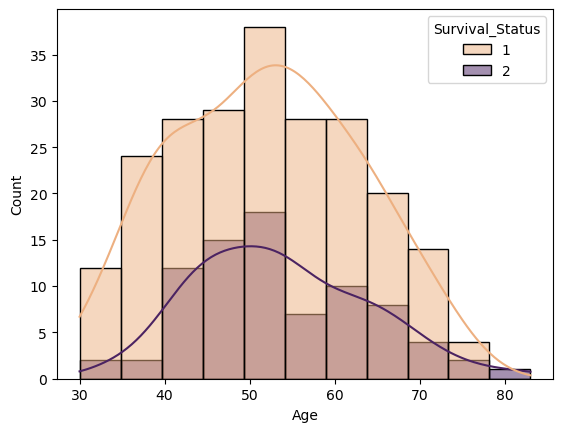

In [33]:
# Univariate Analysis

sns.histplot(x="Age",data=df, hue="Survival_Status", kde = True , palette="flare")

<Axes: xlabel='Operation_Year', ylabel='Count'>

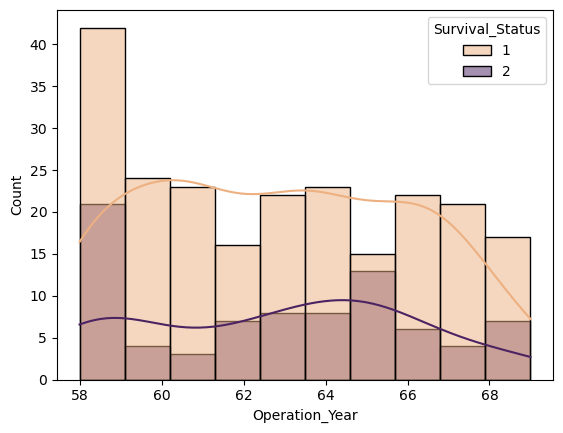

In [32]:
sns.histplot(x="Operation_Year",data=df, hue="Survival_Status", kde = True , palette="flare")

<Axes: xlabel='axil_nodes', ylabel='Count'>

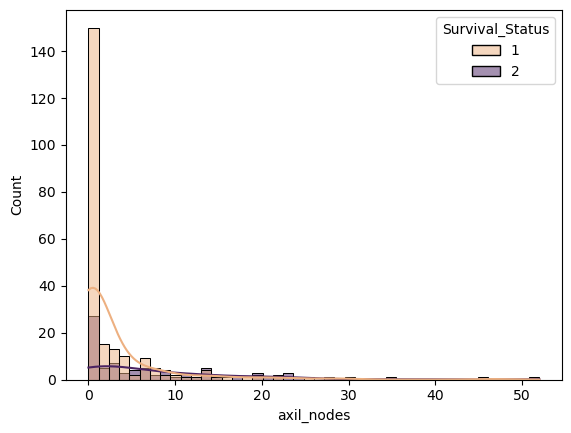

In [34]:
sns.histplot(x="axil_nodes",data=df, hue="Survival_Status", kde = True , palette="flare")

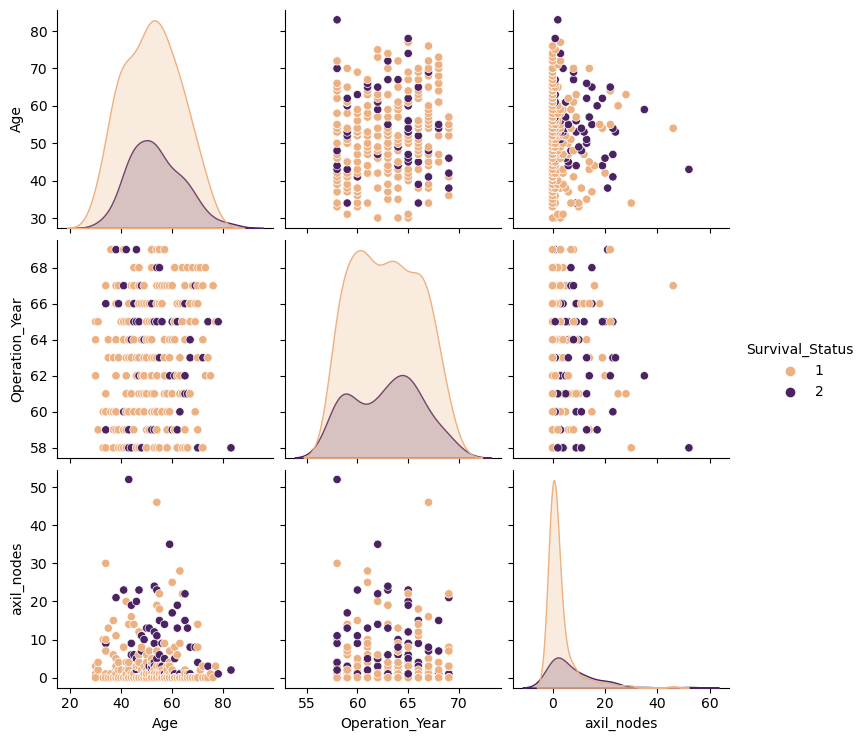

In [31]:
# Pair Plot 

sns.pairplot(data=df, hue="Survival_Status", palette="flare")

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


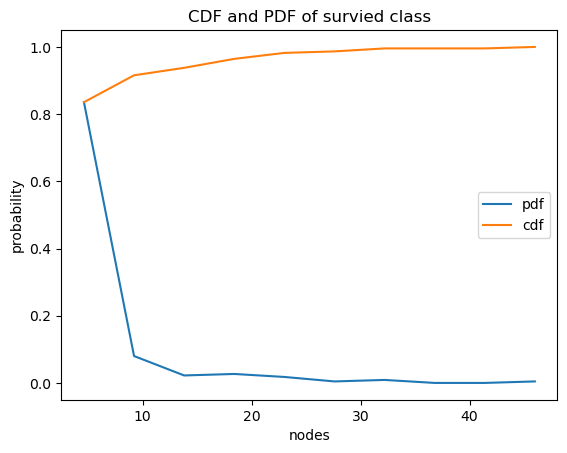

In [40]:
df_survived = df[df['Survival_Status']==1]
df_died = df[df['Survival_Status']==2]

counts, bin_edges = np.histogram(df_survived['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf');
plt.plot(bin_edges[1:], cdf, label='cdf')


counts, bin_edges = np.histogram(df_survived['axil_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.title('CDF and PDF of survied class')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.legend()
plt.show();

- 80% of Survived people have less than 5 nodes
- 

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


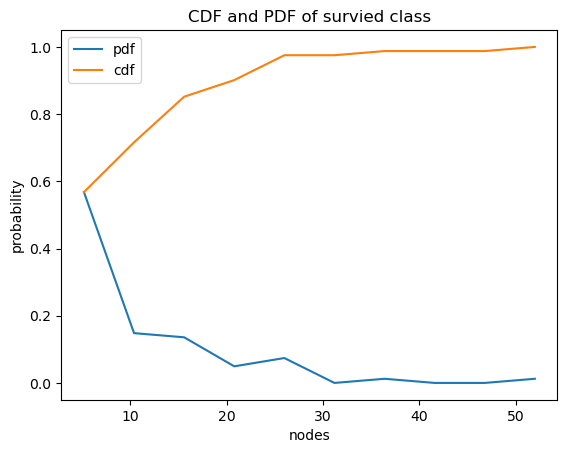

In [41]:
counts, bin_edges = np.histogram(df_died['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf');
plt.plot(bin_edges[1:], cdf, label='cdf')


counts, bin_edges = np.histogram(df_died['axil_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.title('CDF and PDF of survied class')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.legend()
plt.show();